## 4 - Summarizing experiments

In [1]:
!pip install PyDrive
!pip install latex
!apt-get update
!sudo apt-get install texlive-publishers
!sudo apt-get install dvipng
!pip install ghostscript

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,609 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 256 kB in 2s (122 kB/s)
Reading package lists... Done
Reading package lists... Done
B

In [2]:
!latex --version

pdfTeX 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian)
kpathsea version 6.2.3
Copyright 2017 Han The Thanh (pdfTeX) et al.
There is NO warranty.  Redistribution of this software is
covered by the terms of both the pdfTeX copyright and
the Lesser GNU General Public License.
For more information about these matters, see the file
named COPYING and the pdfTeX source.
Primary author of pdfTeX: Han The Thanh (pdfTeX) et al.
Compiled with libpng 1.6.34; using libpng 1.6.34
Compiled with zlib 1.2.11; using zlib 1.2.11
Compiled with poppler version 0.62.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks/6135/Assignment_2"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
data  Q4_IFT6135-H2019-Assignment2.ipynb  results


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [0]:
data_folder = '/content/drive/My Drive/Colab Notebooks//6135/Assignment_2/data'
file = 'learning_curves.npy'
plots_folder = '/content/drive/My Drive/Colab Notebooks//6135/Assignment_2/results/figures'


## Gathering the data for each experiment

in folder data:
  *  for each subfolders:



> *  load the learning curves
*   get name and config
*  append cmd line
*  append to configs
*  plot the 2 plots
*  append to results
*  append validation learning curves to optimisers plot
*  append validation learning curves to architechtures plot

*  plot optimisers
*  plot architectures


In [6]:
#results_folders = load_folders()[]
def get_subfolders(path):
    return [name for name in os.listdir(path)
            if os.path.isdir(os.path.join(path, name))]
  
results_folders = get_subfolders(data_folder)
results_folders

#append info

['TRANSFORMER_ADAM_01',
 'RNN_SGD_LR_SCHEDULE_01',
 'TRANSFORMER_SGD_01',
 'GRU_ADAM_01',
 'RNN_SGD_01',
 'GRU_SGD_01']

In [0]:
"""
load model data
 {Model_name:, Config:{...}, Cmd_line:, curves :, train:, best_val:, best_epoch}
  #load curve and discard losses
  #update with run time
  #load and parse config
  #get name
  #get cmd line
  #get best validation
"""

def get_config(exp_config):
    
  # configs
  with open(exp_config) as f:
          lines = f.readlines()
          list = [line.split() for line in lines]
  config = dict(list)

  config.pop('data')
  config.pop('code_file')
  config.pop('save_dir')
  config.pop('debug')
  config.pop('evaluate')
  config.pop('num_epochs')
  config.pop('save_best')
  config.pop('seed')
  config.pop('emb_size')
  cmd_args = ""
  for key in ['model', 'optimizer', 'initial_lr', 'batch_size', 'seq_len',\
                     'hidden_size', 'num_layers', 'dp_keep_prob']:
    cmd_args += (" --" + key + "="+ config.get(key))

  cmd_args = cmd_args.lstrip() 
  return config.get('model'), config, cmd_args


def parse_folder(folder):
  exp = {}
  
  path = folder + "/" + file
  log = folder + "/log.txt"
  exp_config = folder + "/exp_config.txt"
  curve = np.load(path)[()]
  keys = np.array(curve.keys())
  
  # discard losses
  curve.pop('train_losses')
  curve.pop('val_losses')
  curve.keys()

  #from log get list of epoch times
  with open(log) as f:
          lines = f.readlines()
          times = [float(line.rpartition(" ")[2].rstrip()) for line in lines]
          curve.update( {'time' : \
                  [np.sum(times[:i+1]) for i in range(len(times))]} )

  model, config, line = get_config(exp_config)        
          
  # putting it all togheter 
  exp.update( {'model' : model })
  exp.update( {'config' : config })
  exp.update( {'cmd_line' : line })
  exp.update( {'curve' : curve })
  exp.update( {'best_epoch' :  np.argmin(curve['val_ppls']) })
  exp.update( {'train' : curve['train_ppls'][exp.get('best_epoch')] })
  exp.update( {'val' : curve['val_ppls'][exp.get('best_epoch')] })
  exp.update( {'optimizer' : exp.get('config').get('optimizer') })
  
  return exp

experiment = parse_folder(data_folder + "/" + results_folders[0])

In [8]:
def config_tex(experiment):
  df = pd.DataFrame(experiment['config'],index=[0])
  df = df[['model', 'optimizer', 'initial_lr', 'batch_size', 'seq_len',\
                      'hidden_size', 'num_layers', 'dp_keep_prob']]
  print(df.to_latex(index=True))
  
config_tex(experiment)  

\begin{tabular}{lllllllll}
\toprule
{} &        model & optimizer & initial\_lr & batch\_size & seq\_len & hidden\_size & num\_layers & dp\_keep\_prob \\
\midrule
0 &  TRANSFORMER &      ADAM &      0.001 &        128 &      35 &         512 &          2 &          0.9 \\
\bottomrule
\end{tabular}



## Plotting


RNN-1

\begin{tabular}{lllllllll}
\toprule
{} &        model & optimizer & initial\_lr & batch\_size & seq\_len & hidden\_size & num\_layers & dp\_keep\_prob \\
\midrule
0 &  TRANSFORMER &      ADAM &      0.001 &        128 &      35 &         512 &          2 &          0.9 \\
\bottomrule
\end{tabular}



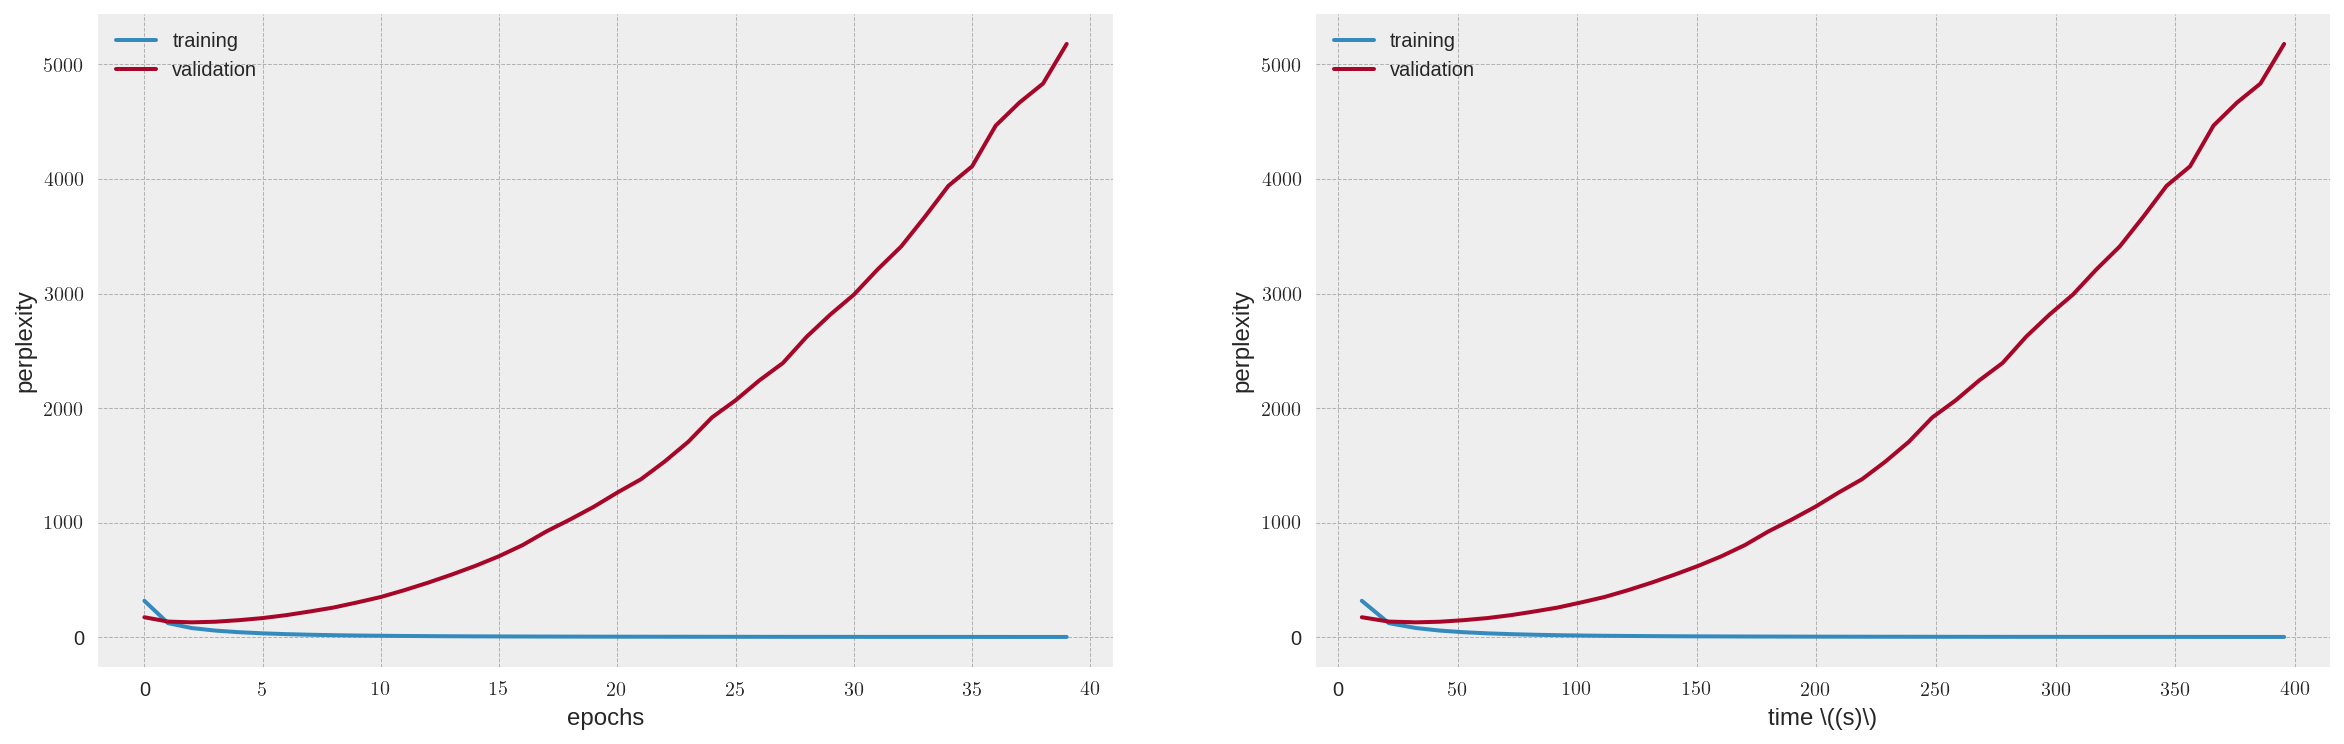

--model=TRANSFORMER --optimizer=ADAM --initial_lr=0.001 --batch_size=128 --seq_len=35 --hidden_size=512 --num_layers=2 --dp_keep_prob=0.9


In [9]:
% matplotlib inline

#plot learning curve(train or val, epoch or time)
def plot_experiment(exp, name):
  print("\n"+name+"\n")
  plt.style.use('bmh')

  # plot and save figures
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

  ax1.plot(experiment['curve']['train_ppls'], label = 'training')
  ax1.plot(experiment['curve']['val_ppls'], label = 'validation')
  ax1.set_ylabel('perplexity')
  ax1.set_xlabel('epochs')
  ax1.legend()

  ax2.plot(experiment['curve']['time'],experiment['curve']['train_ppls'], label = 'training')
  ax2.plot(experiment['curve']['time'], experiment['curve']['val_ppls'], label = 'validation')
  ax2.set_ylabel('perplexity')
  ax2.set_xlabel('time \((s)\)')

  ax2.legend()
  try:
     plt.rc('text', usetex=True)
  except:
     pass

  plt.rc('font', family='serif')

  # High resolution graphs
  %config InlineBackend.figure_format = 'retina'
  
  ##printing and export
  config_tex(experiment)  
  display(fig)
  plt.savefig(os.path.join(plots_folder, "curves_"+ name +".png"))
  plt.close()
  print(experiment['cmd_line'])

## testing  
plot_experiment(experiment, "RNN-1")  


TRANSFORMER-1

\begin{tabular}{lllllllll}
\toprule
{} &        model & optimizer & initial\_lr & batch\_size & seq\_len & hidden\_size & num\_layers & dp\_keep\_prob \\
\midrule
0 &  TRANSFORMER &      ADAM &      0.001 &        128 &      35 &         512 &          2 &          0.9 \\
\bottomrule
\end{tabular}



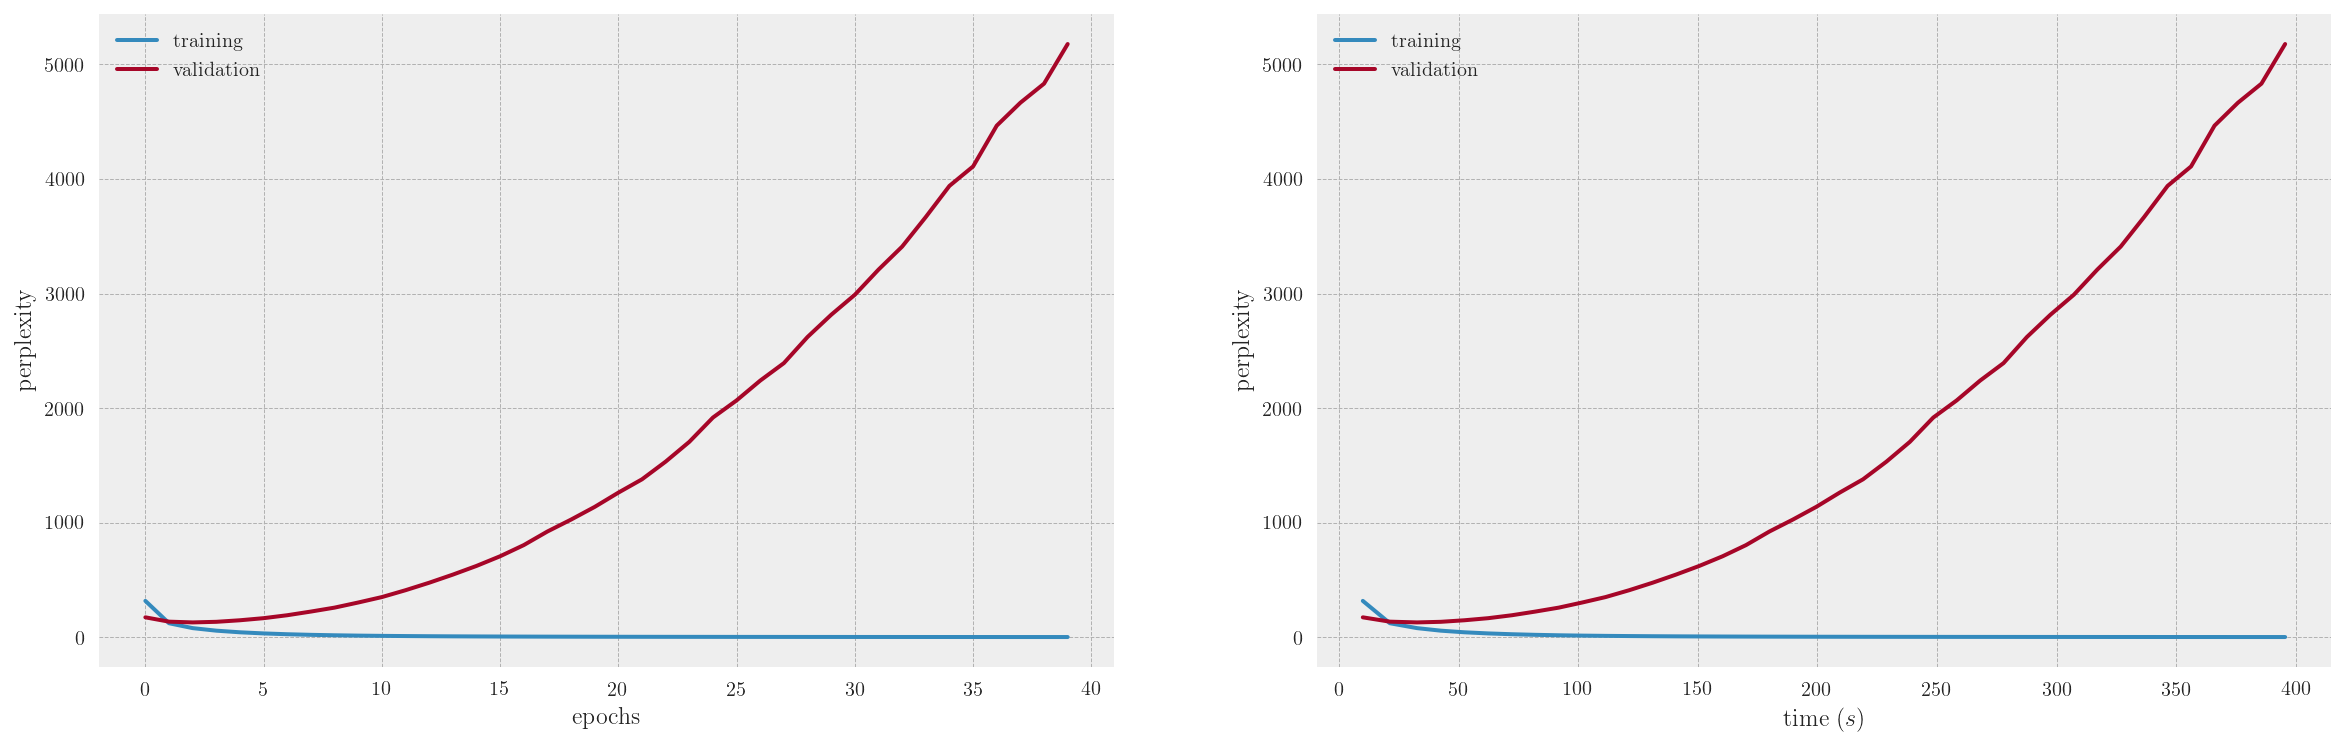

--model=TRANSFORMER --optimizer=ADAM --initial_lr=0.001 --batch_size=128 --seq_len=35 --hidden_size=512 --num_layers=2 --dp_keep_prob=0.9

RNN-1

\begin{tabular}{lllllllll}
\toprule
{} & model &        optimizer & initial\_lr & batch\_size & seq\_len & hidden\_size & num\_layers & dp\_keep\_prob \\
\midrule
0 &   RNN &  SGD\_LR\_SCHEDULE &        1.0 &         20 &      35 &         512 &          2 &         0.35 \\
\bottomrule
\end{tabular}



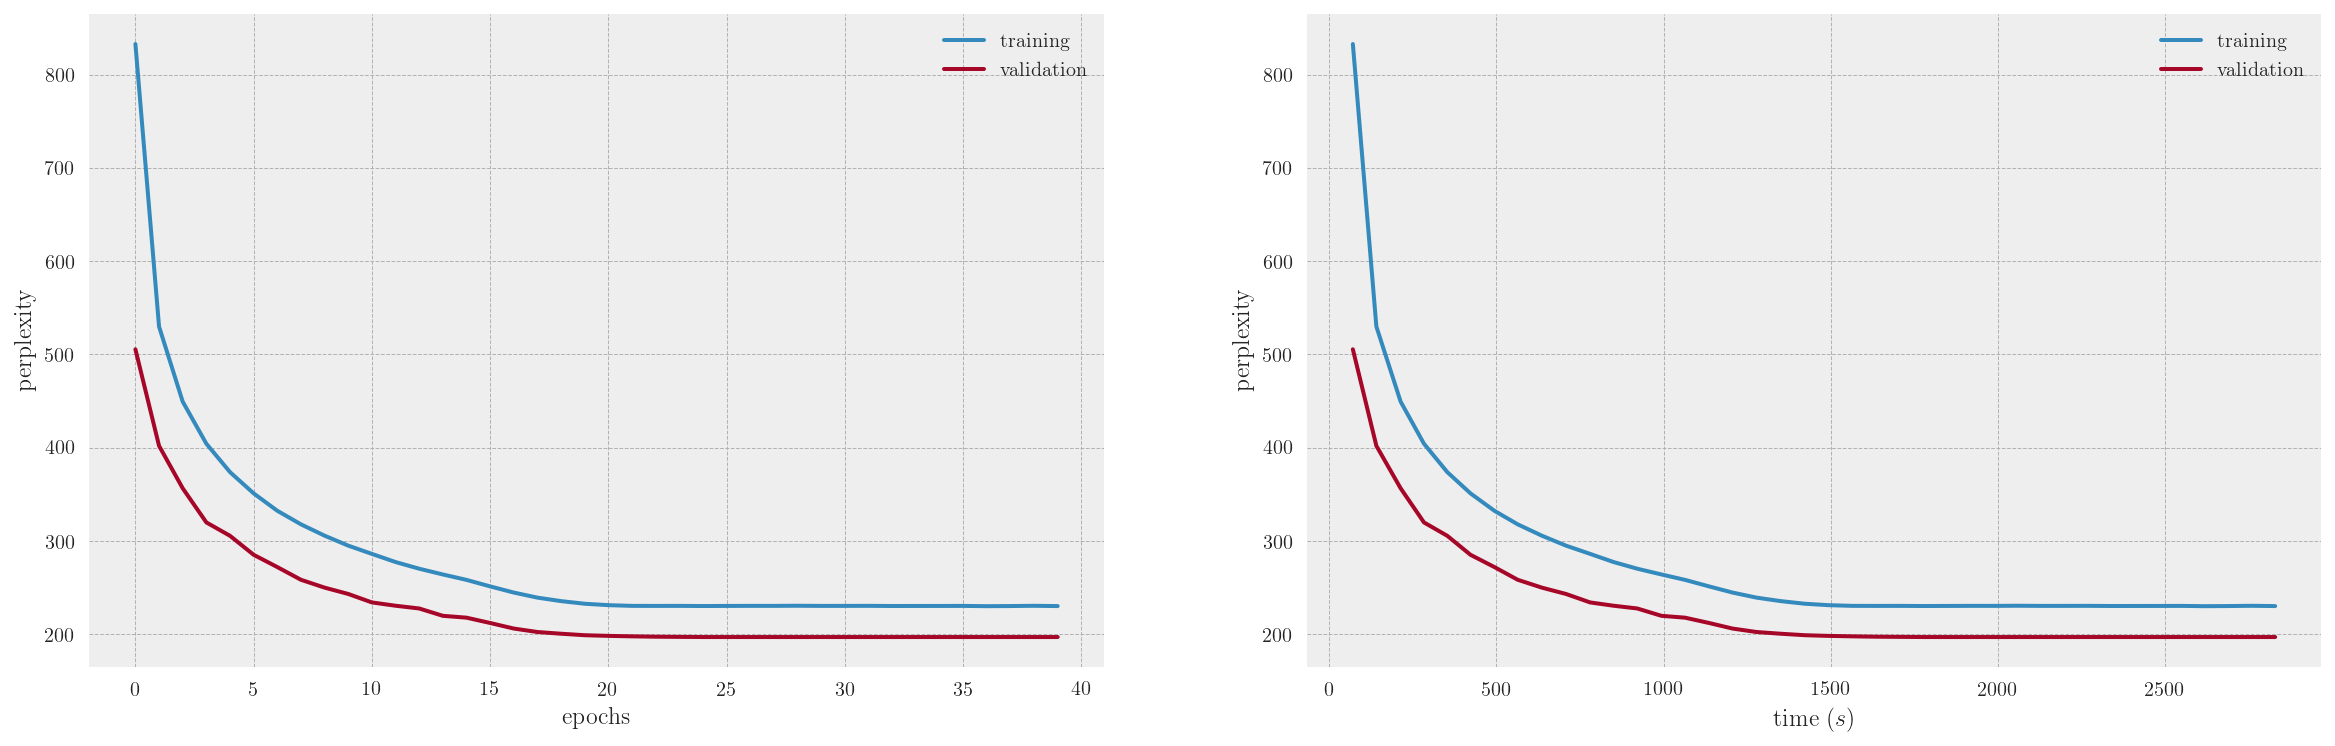

--model=RNN --optimizer=SGD_LR_SCHEDULE --initial_lr=1.0 --batch_size=20 --seq_len=35 --hidden_size=512 --num_layers=2 --dp_keep_prob=0.35

TRANSFORMER-2

\begin{tabular}{lllllllll}
\toprule
{} &        model & optimizer & initial\_lr & batch\_size & seq\_len & hidden\_size & num\_layers & dp\_keep\_prob \\
\midrule
0 &  TRANSFORMER &       SGD &       20.0 &        128 &      35 &         512 &          6 &          0.9 \\
\bottomrule
\end{tabular}



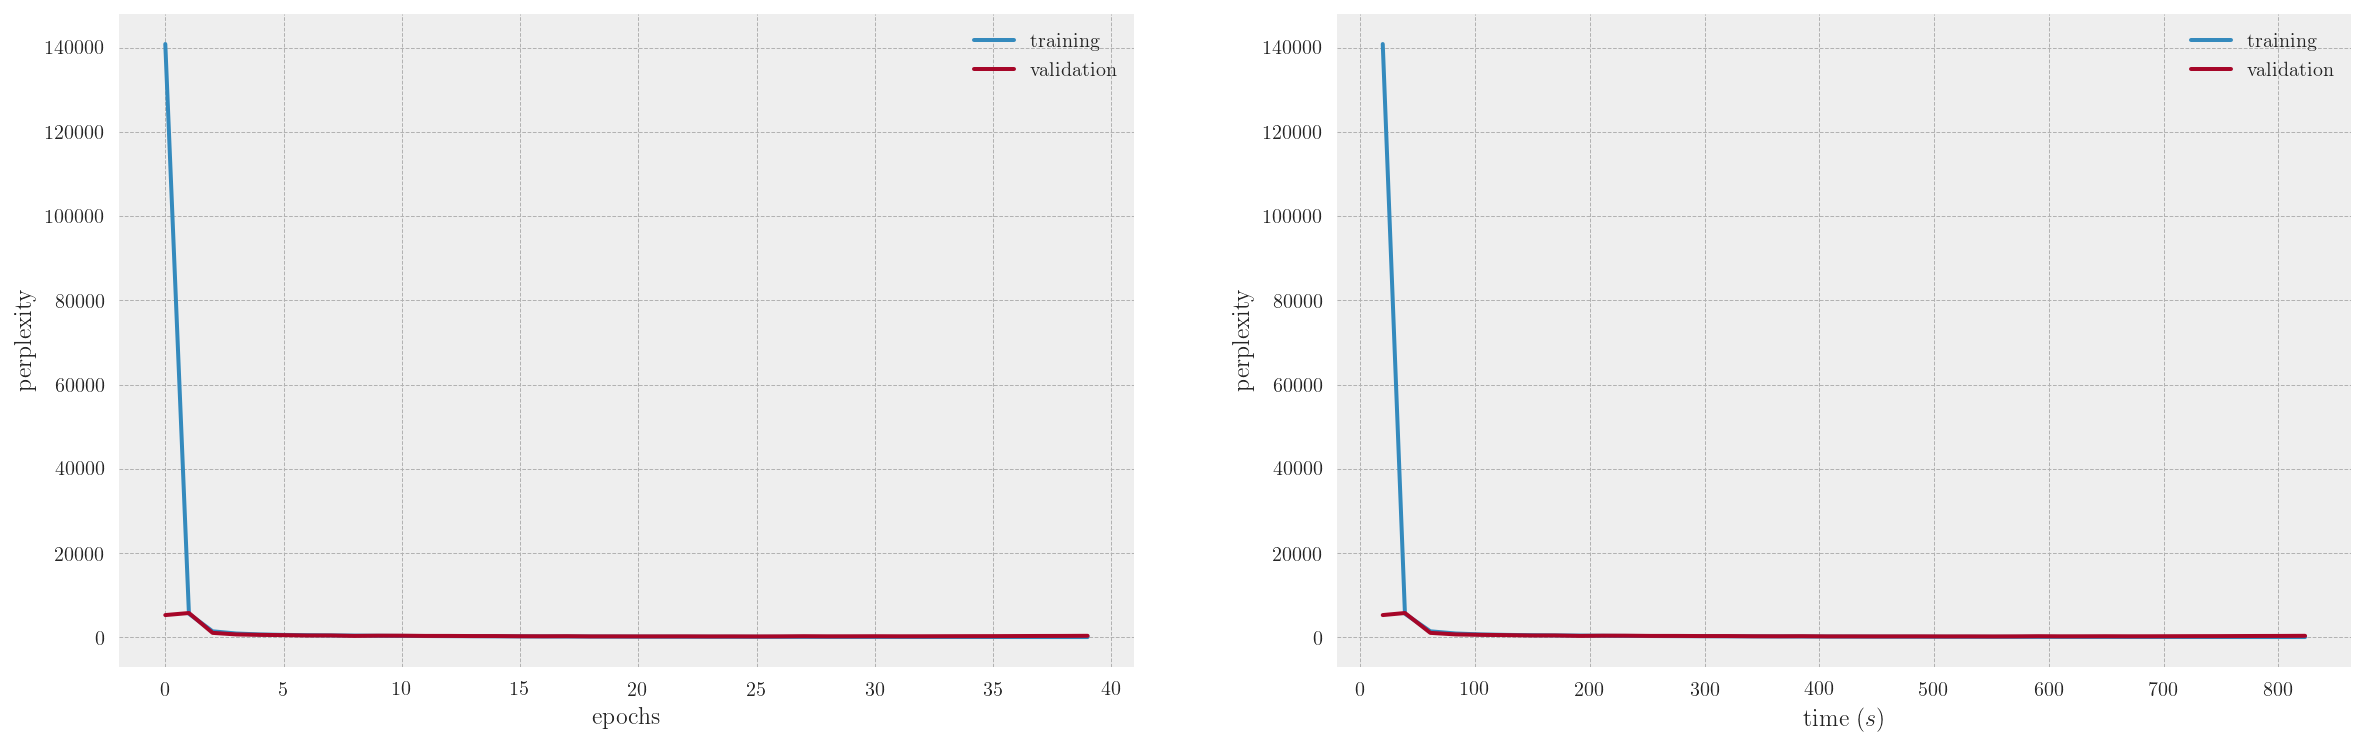

--model=TRANSFORMER --optimizer=SGD --initial_lr=20.0 --batch_size=128 --seq_len=35 --hidden_size=512 --num_layers=6 --dp_keep_prob=0.9

GRU-1

\begin{tabular}{lllllllll}
\toprule
{} & model & optimizer & initial\_lr & batch\_size & seq\_len & hidden\_size & num\_layers & dp\_keep\_prob \\
\midrule
0 &   GRU &      ADAM &     0.0001 &         20 &      35 &        1500 &          2 &         0.35 \\
\bottomrule
\end{tabular}



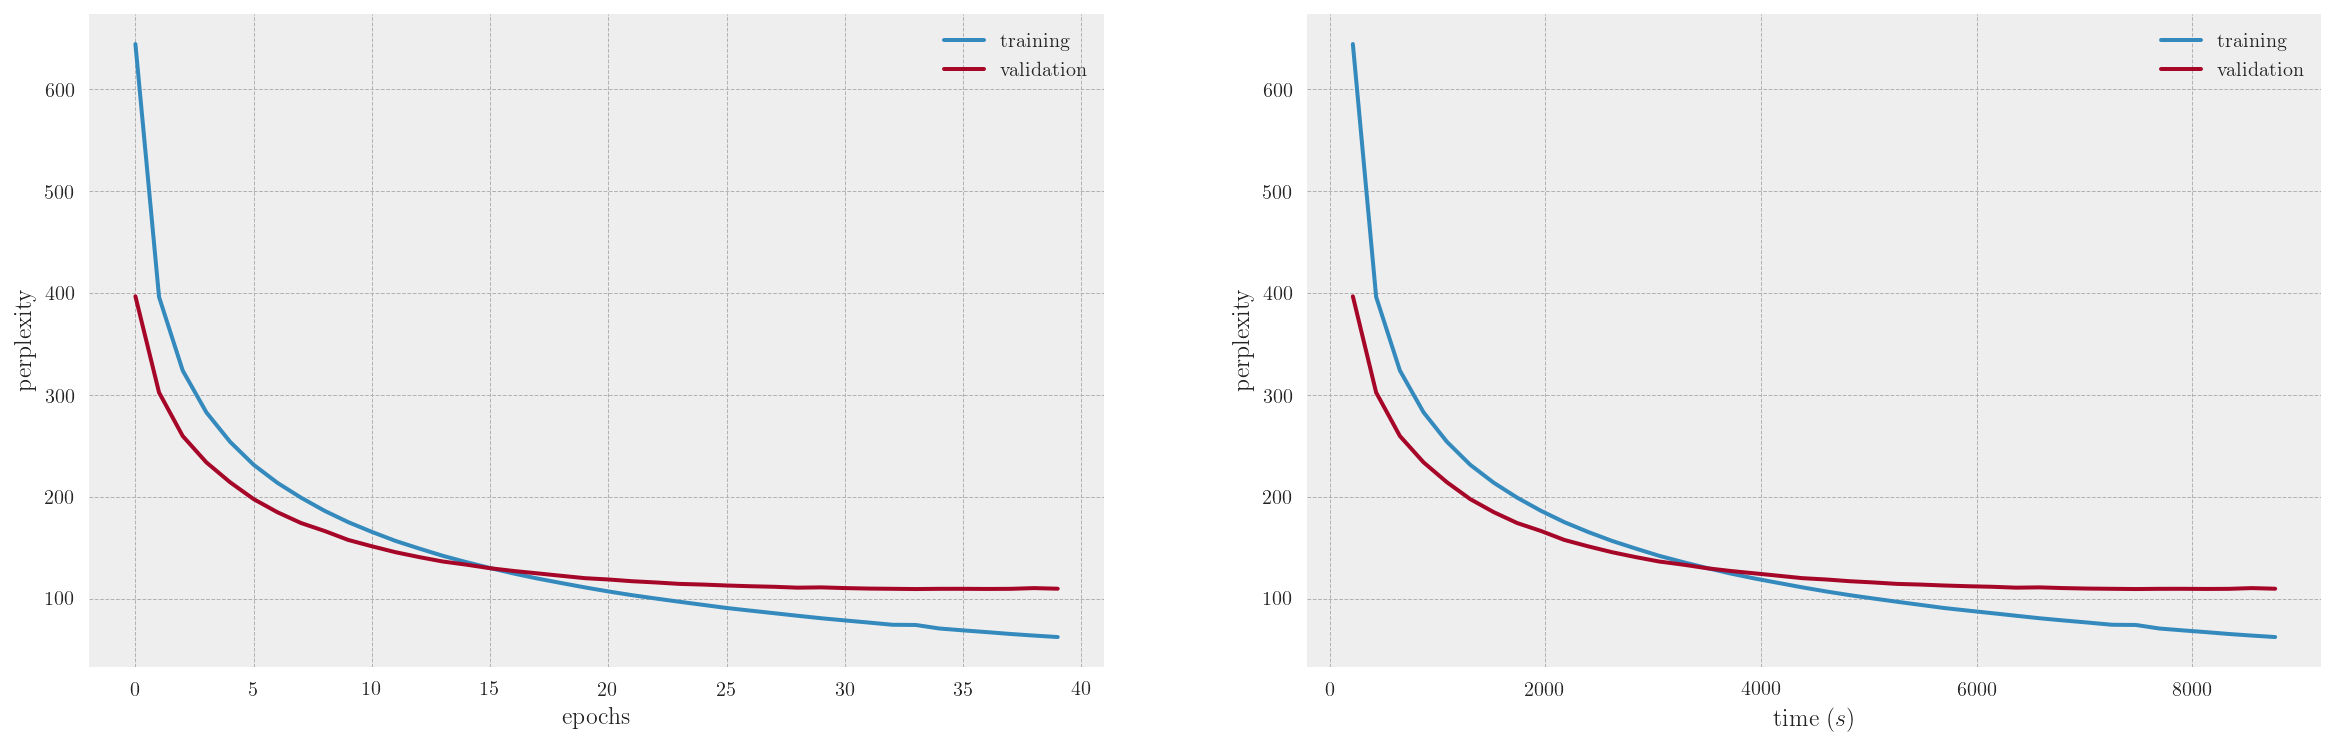

--model=GRU --optimizer=ADAM --initial_lr=0.0001 --batch_size=20 --seq_len=35 --hidden_size=1500 --num_layers=2 --dp_keep_prob=0.35

RNN-2

\begin{tabular}{lllllllll}
\toprule
{} & model & optimizer & initial\_lr & batch\_size & seq\_len & hidden\_size & num\_layers & dp\_keep\_prob \\
\midrule
0 &   RNN &       SGD &     0.0001 &         20 &      35 &        1500 &          2 &         0.35 \\
\bottomrule
\end{tabular}



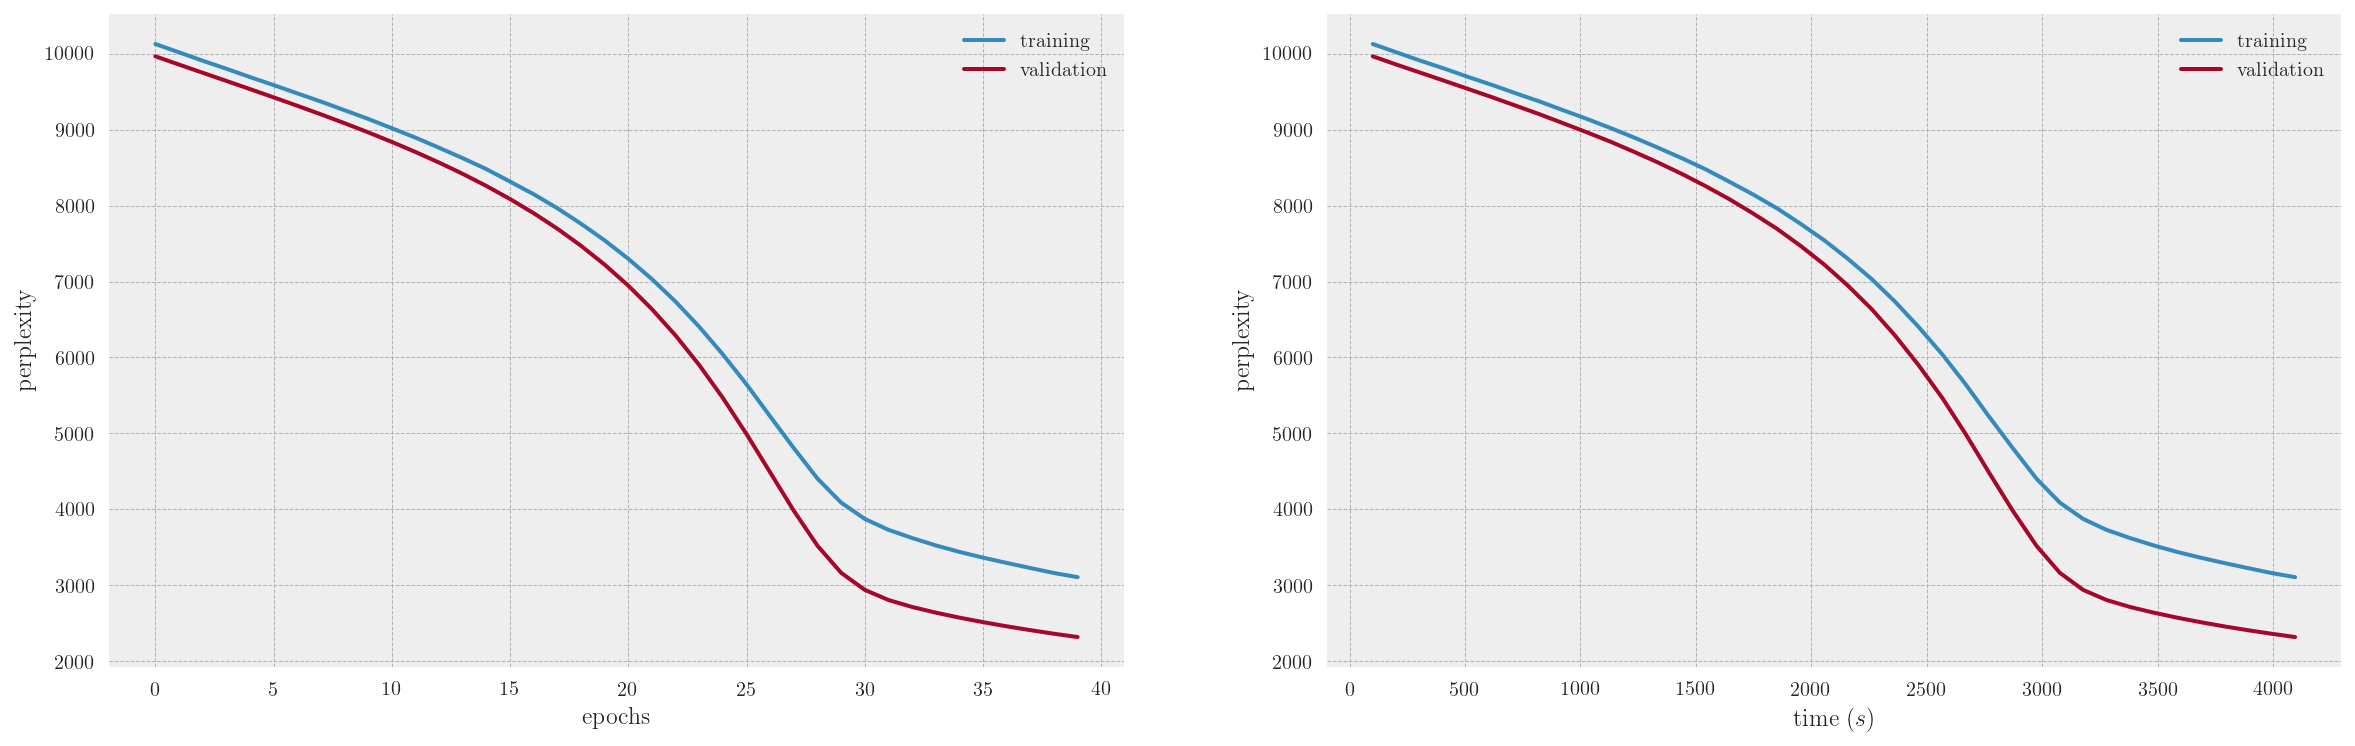

--model=RNN --optimizer=SGD --initial_lr=0.0001 --batch_size=20 --seq_len=35 --hidden_size=1500 --num_layers=2 --dp_keep_prob=0.35

GRU-2

\begin{tabular}{lllllllll}
\toprule
{} & model & optimizer & initial\_lr & batch\_size & seq\_len & hidden\_size & num\_layers & dp\_keep\_prob \\
\midrule
0 &   GRU &       SGD &       10.0 &         20 &      35 &        1500 &          2 &         0.35 \\
\bottomrule
\end{tabular}



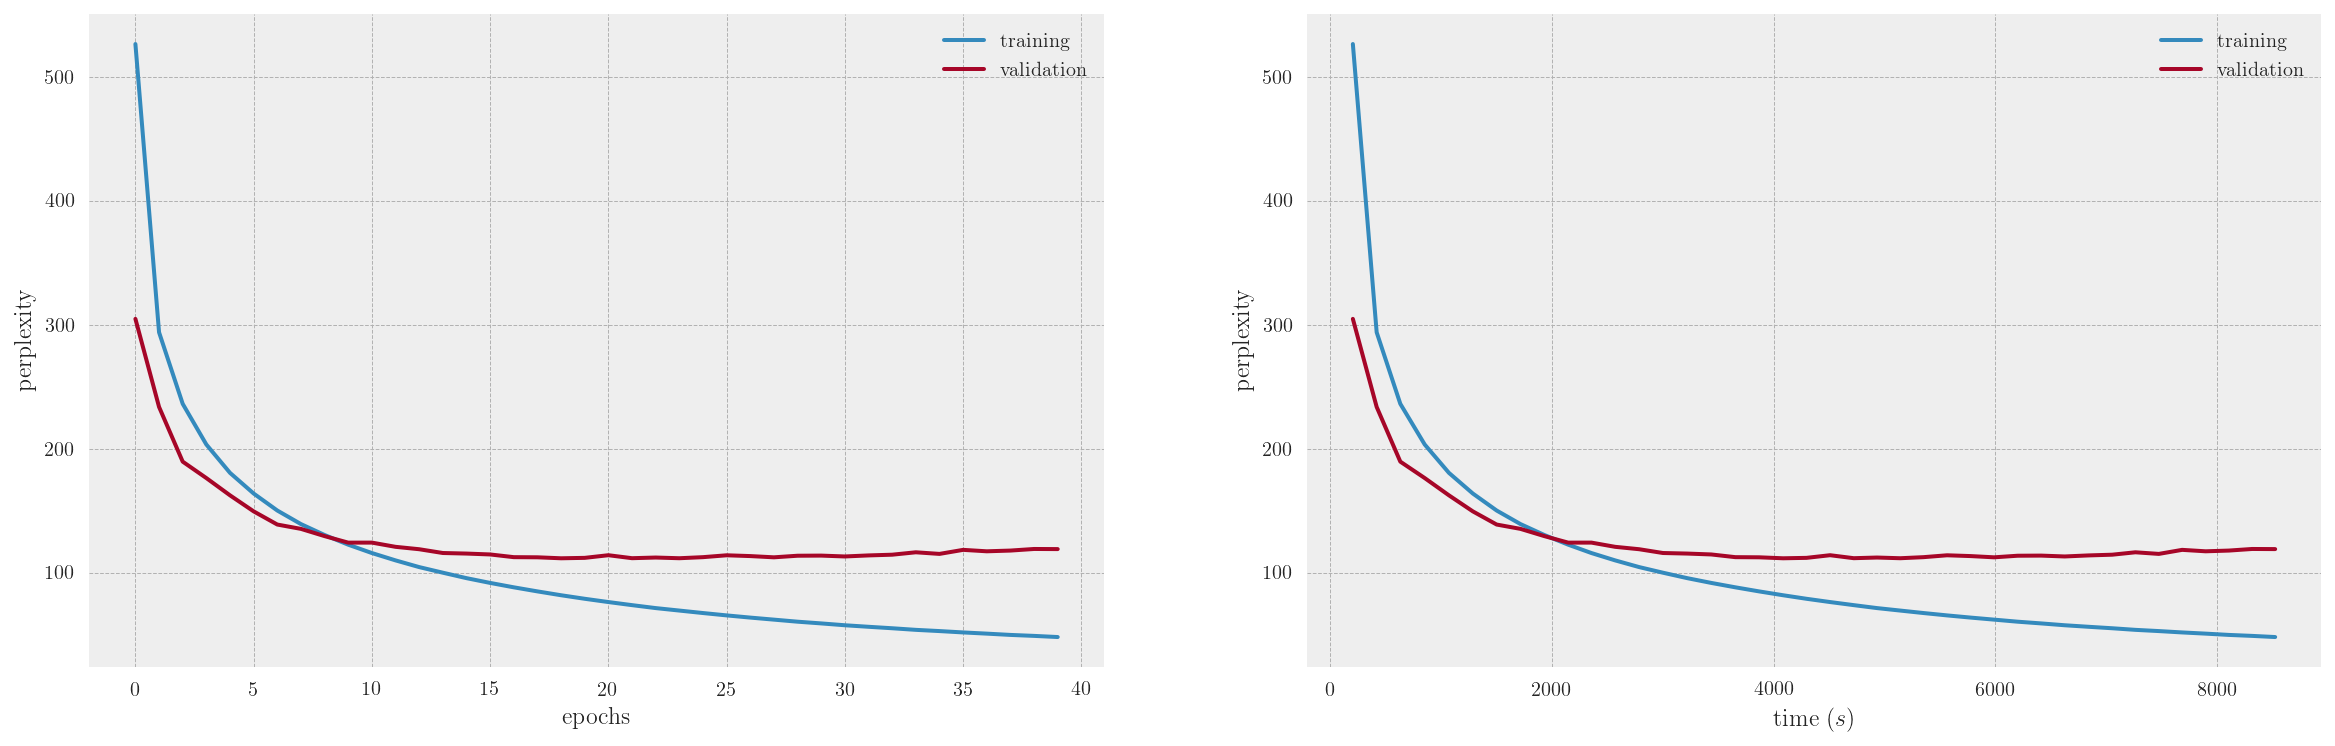

--model=GRU --optimizer=SGD --initial_lr=10.0 --batch_size=20 --seq_len=35 --hidden_size=1500 --num_layers=2 --dp_keep_prob=0.35


In [10]:
#parse all folders
rnn_count = 0
gru_count = 0
trnsf_count = 0

#dictionary of all experiments
experiments = {}

for folder in results_folders:
  experiment = parse_folder(data_folder + "/" + folder)
  if experiment['model'] == "RNN":
    rnn_count += 1
    i = rnn_count
  elif experiment['model'] == "GRU":
    gru_count += 1
    i = gru_count
  elif experiment['model'] == "TRANSFORMER":
    trnsf_count += 1
    i = trnsf_count
  
  name = experiment['model'] +"-"+ str(i)
  plot_experiment(experiment, name)
  experiments.update( { name : experiment })
  

## Summary table

In [11]:
summary = pd.DataFrame(experiments).transpose()
summary.sort_values(by="val").groupby(["model","optimizer"])
summary = summary[['optimizer', 'train', 'val']]
summary

,optimizer,train,val
GRU-1,ADAM,74.2563,109.541
GRU-2,SGD,81.9917,111.776
RNN-1,SGD_LR_SCHEDULE,230.491,197.071
RNN-2,SGD,3107.79,2319.37
TRANSFORMER-1,ADAM,80.9024,130.74
TRANSFORMER-2,SGD,78.9056,172


In [12]:
print(summary.to_latex())

\begin{tabular}{llll}
\toprule
{} &        optimizer &    train &      val \\
\midrule
GRU-1         &             ADAM &  74.2563 &  109.541 \\
GRU-2         &              SGD &  81.9917 &  111.776 \\
RNN-1         &  SGD\_LR\_SCHEDULE &  230.491 &  197.071 \\
RNN-2         &              SGD &  3107.79 &  2319.37 \\
TRANSFORMER-1 &             ADAM &  80.9024 &   130.74 \\
TRANSFORMER-2 &              SGD &  78.9056 &      172 \\
\bottomrule
\end{tabular}



### Optimizers and Architectures

In [0]:
optimizers   = summary.optimizer.unique()
architectures = pd.DataFrame(experiments).transpose().model.unique()

In [14]:
df = pd.DataFrame(experiments).transpose()
filtered = df[df['optimizer']=="ADAM"] 

filtered

,best_epoch,cmd_line,config,curve,model,optimizer,train,val
GRU-1,33,--model=GRU --optimizer=ADAM --initial_lr=0.00...,"{'batch_size': '20', 'dp_keep_prob': '0.35', '...","{'train_ppls': [644.5945326249383, 396.2676052...",GRU,ADAM,74.2563,109.541
TRANSFORMER-1,2,--model=TRANSFORMER --optimizer=ADAM --initial...,"{'batch_size': '128', 'dp_keep_prob': '0.9', '...","{'train_ppls': [318.6805015350089, 123.5818819...",TRANSFORMER,ADAM,80.9024,130.74


In [0]:
#plot learning curves for optimizers/architectures
def plot_compare(experiments, axis = 'optimizer'):  
  ## for each key optimizers/architectures find and plot all curves

  if axis == 'optimizer':
     types = optimizers
  elif axis == 'model':
     types = architectures

  
  for key in types :
    print("\n"+key+"\n")
    plt.style.use('bmh')

    #get curves
    df = pd.DataFrame(experiments).transpose()
    filtered = df[df[axis]==key] 
    
    filtered.head()
    # plot and save figures
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    for experiment in filtered.itertuples():
      ax1.plot(experiment.curve['val_ppls'], label = experiment.Index)
      ax2.plot(experiment.curve['time'], experiment.curve['val_ppls'], label = experiment.Index)

    ax1.set_ylabel('perplexity')
    ax1.set_xlabel('epochs')
    ax1.legend()

    ax2.set_ylabel('perplexity')
    ax2.set_xlabel('time \((s)\)')
    ax2.legend()
    
    try:
       plt.rc('text', usetex=True)
    except:
       pass

    plt.rc('font', family='serif')

    # High resolution graphs
    %config InlineBackend.figure_format = 'retina'

    ##printing and export  
    display(fig)
    plt.savefig(os.path.join(plots_folder, "curves_"+ axis + "_" + key +".png"))
    plt.close()



ADAM



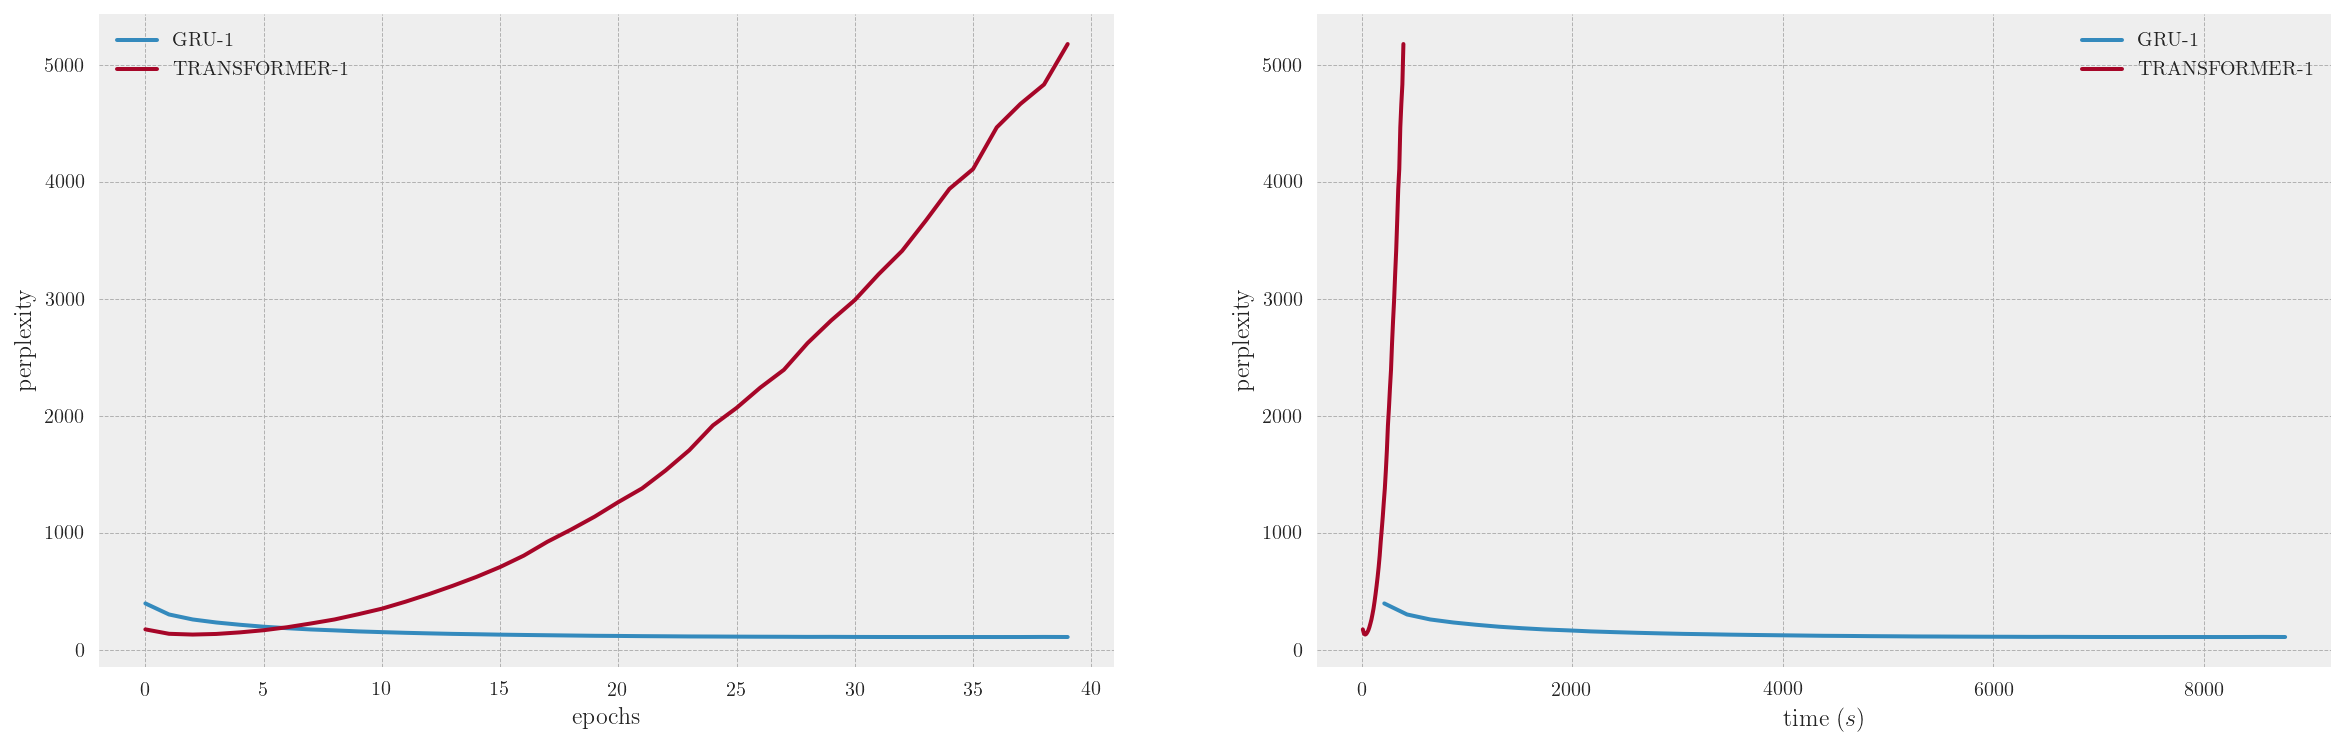


SGD



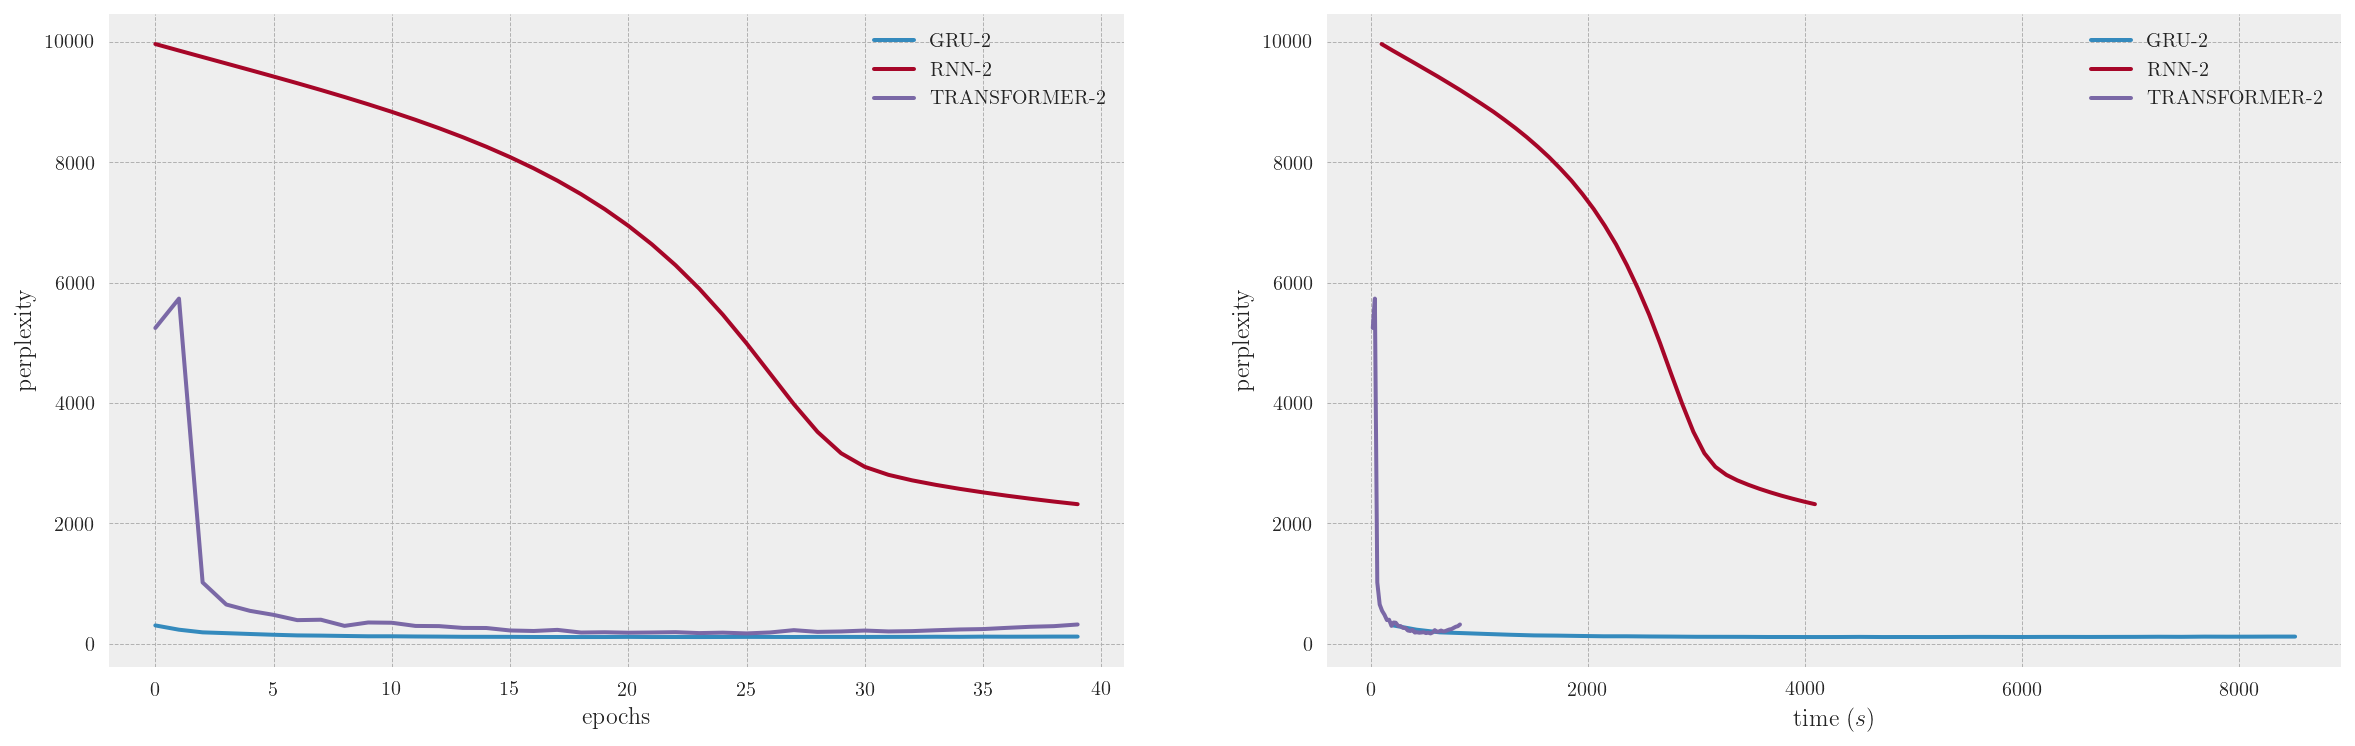


SGD_LR_SCHEDULE



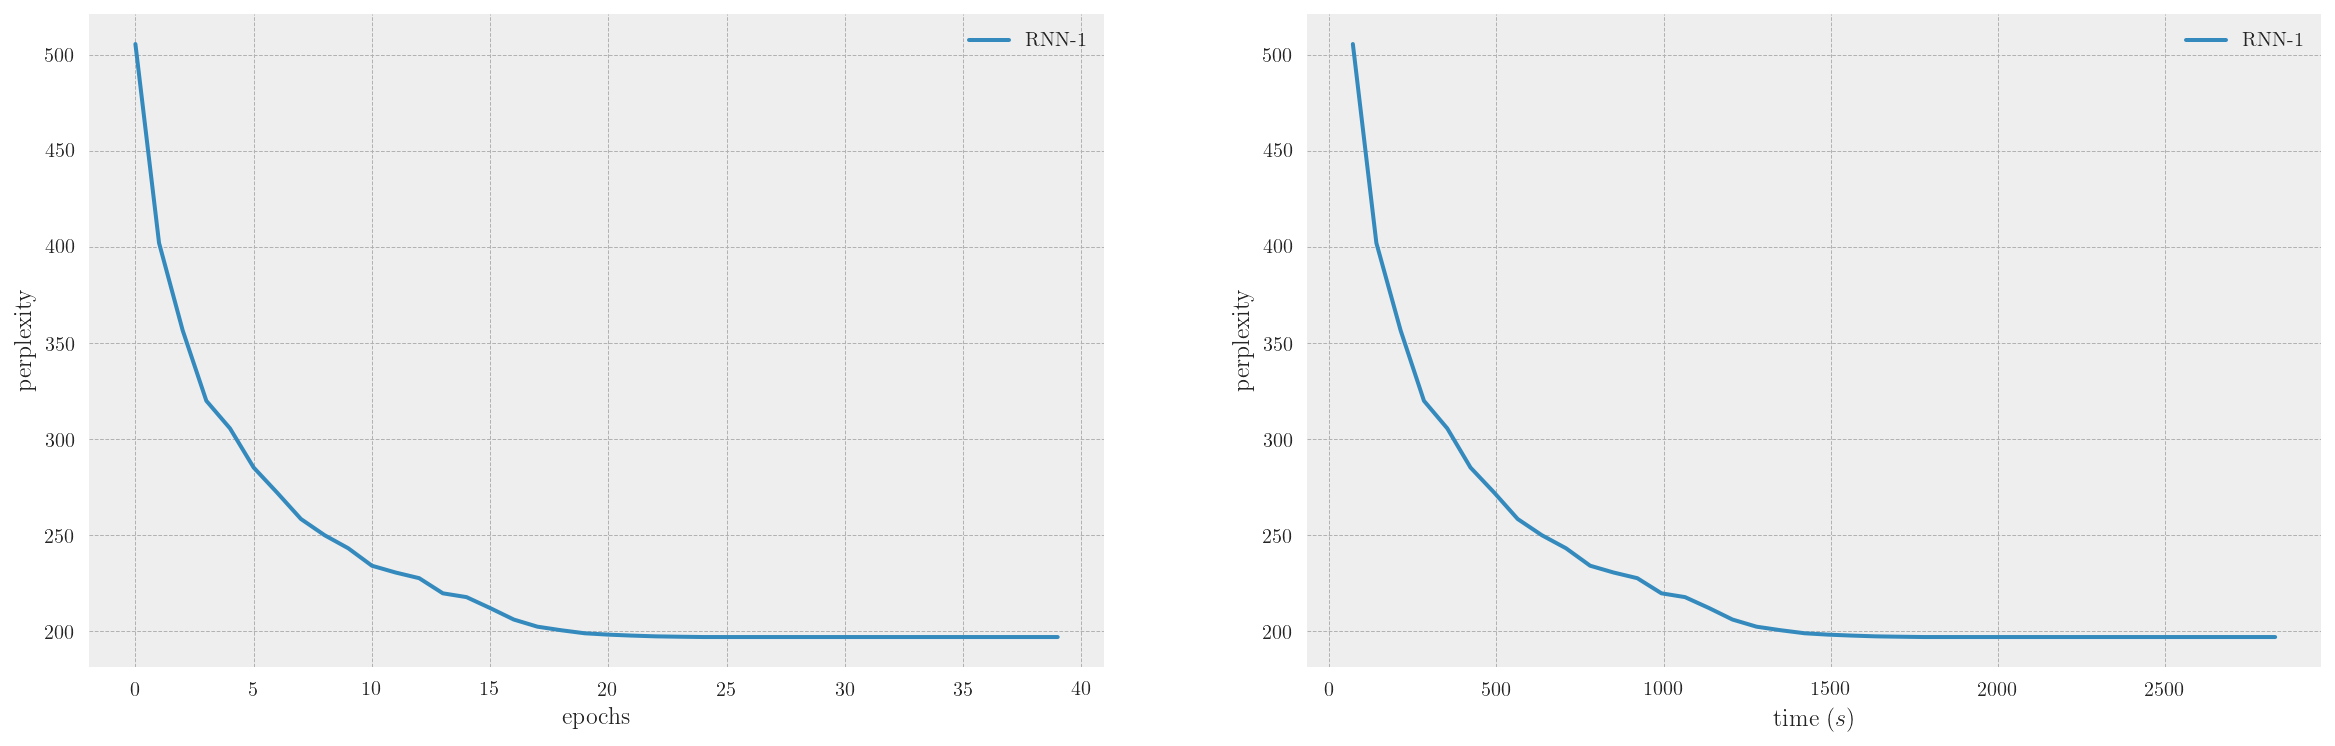

In [16]:
plot_compare(experiments, axis = 'optimizer')


GRU



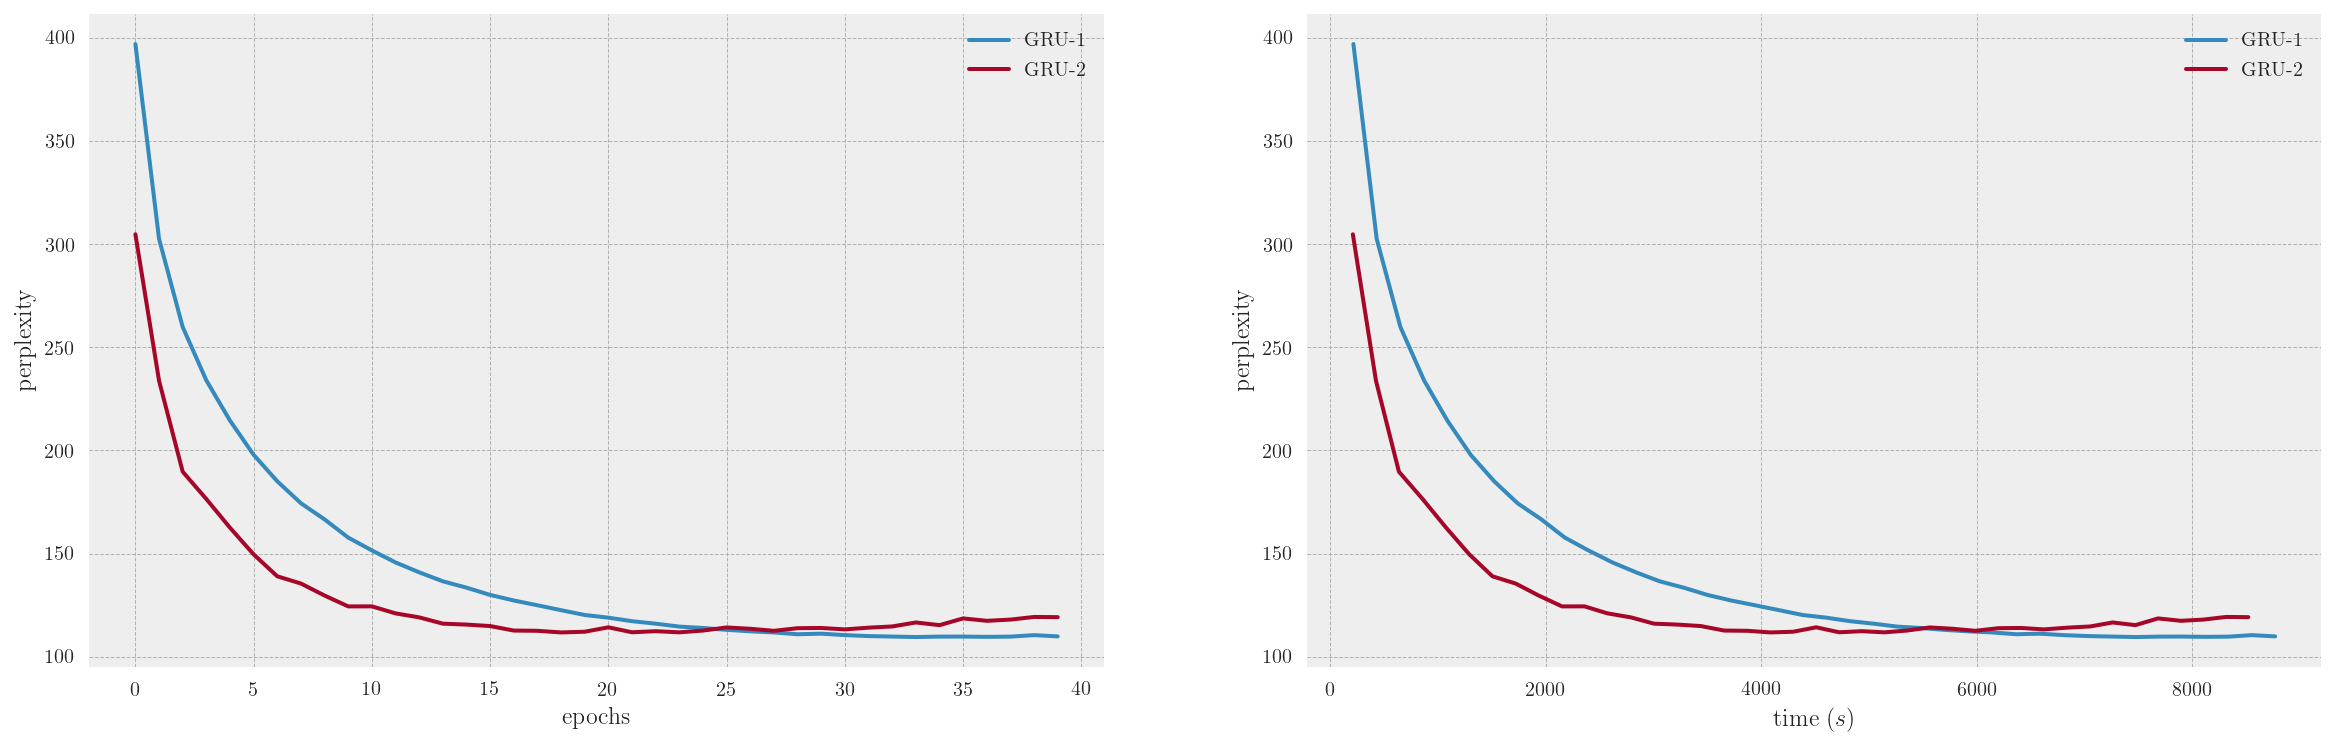


RNN



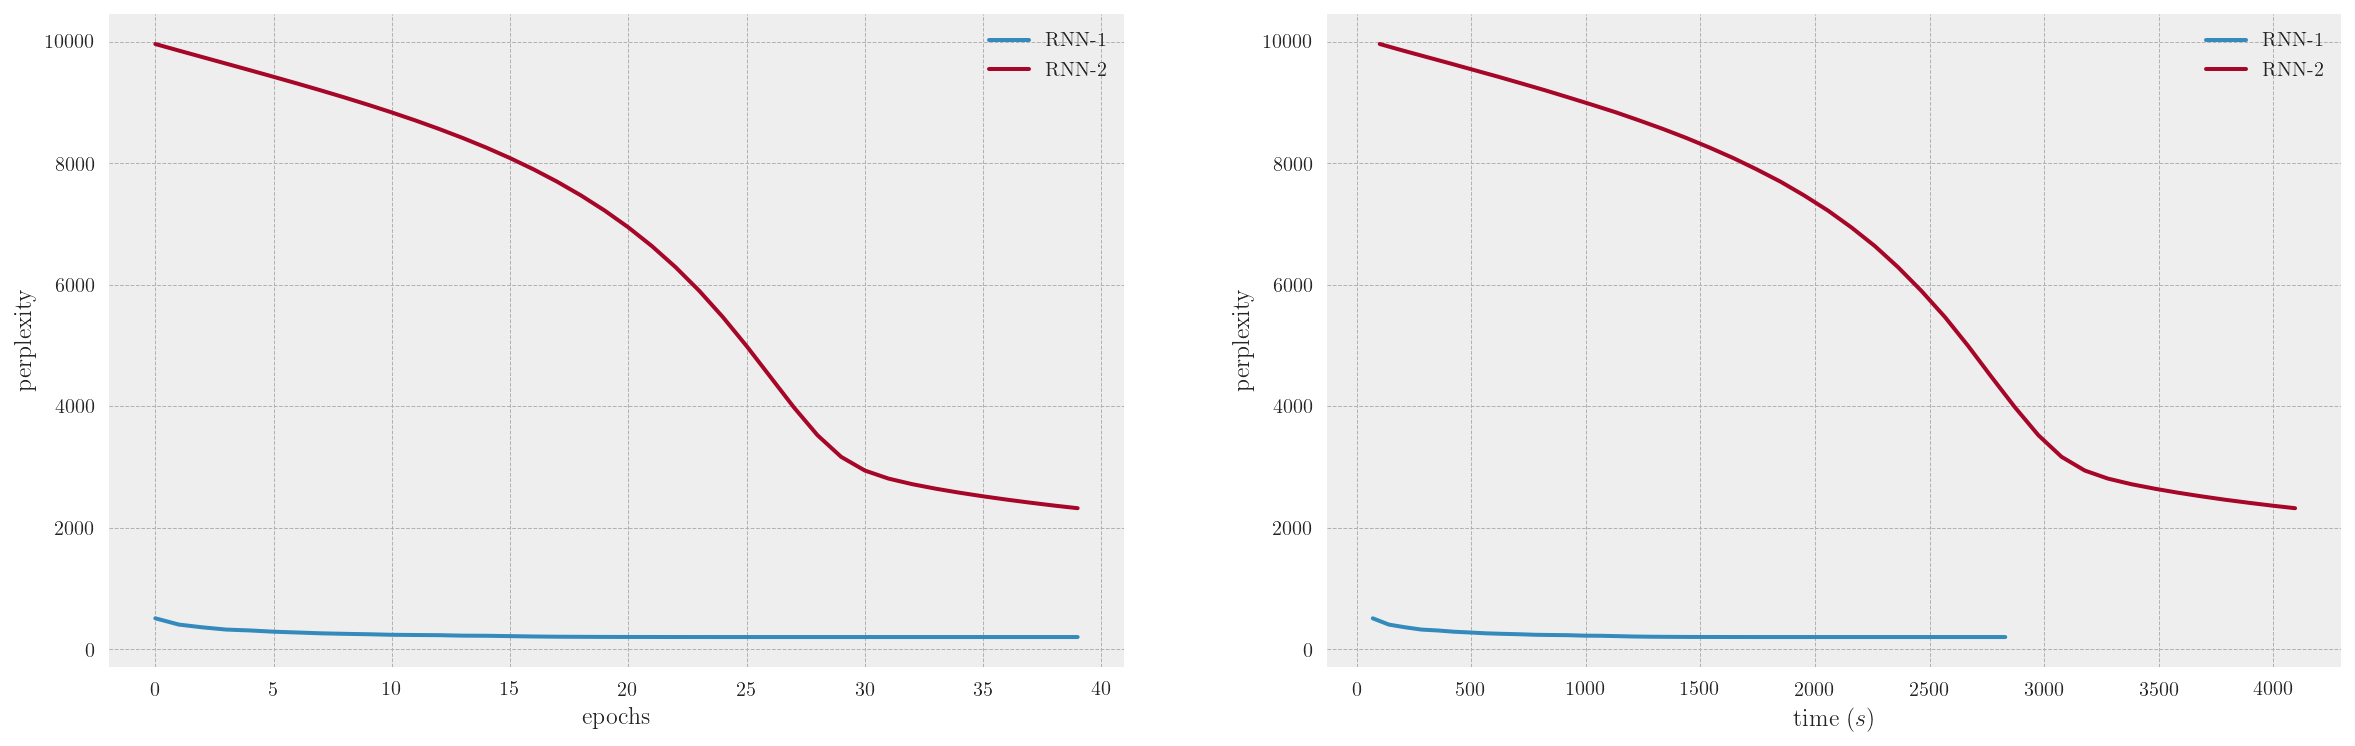


TRANSFORMER



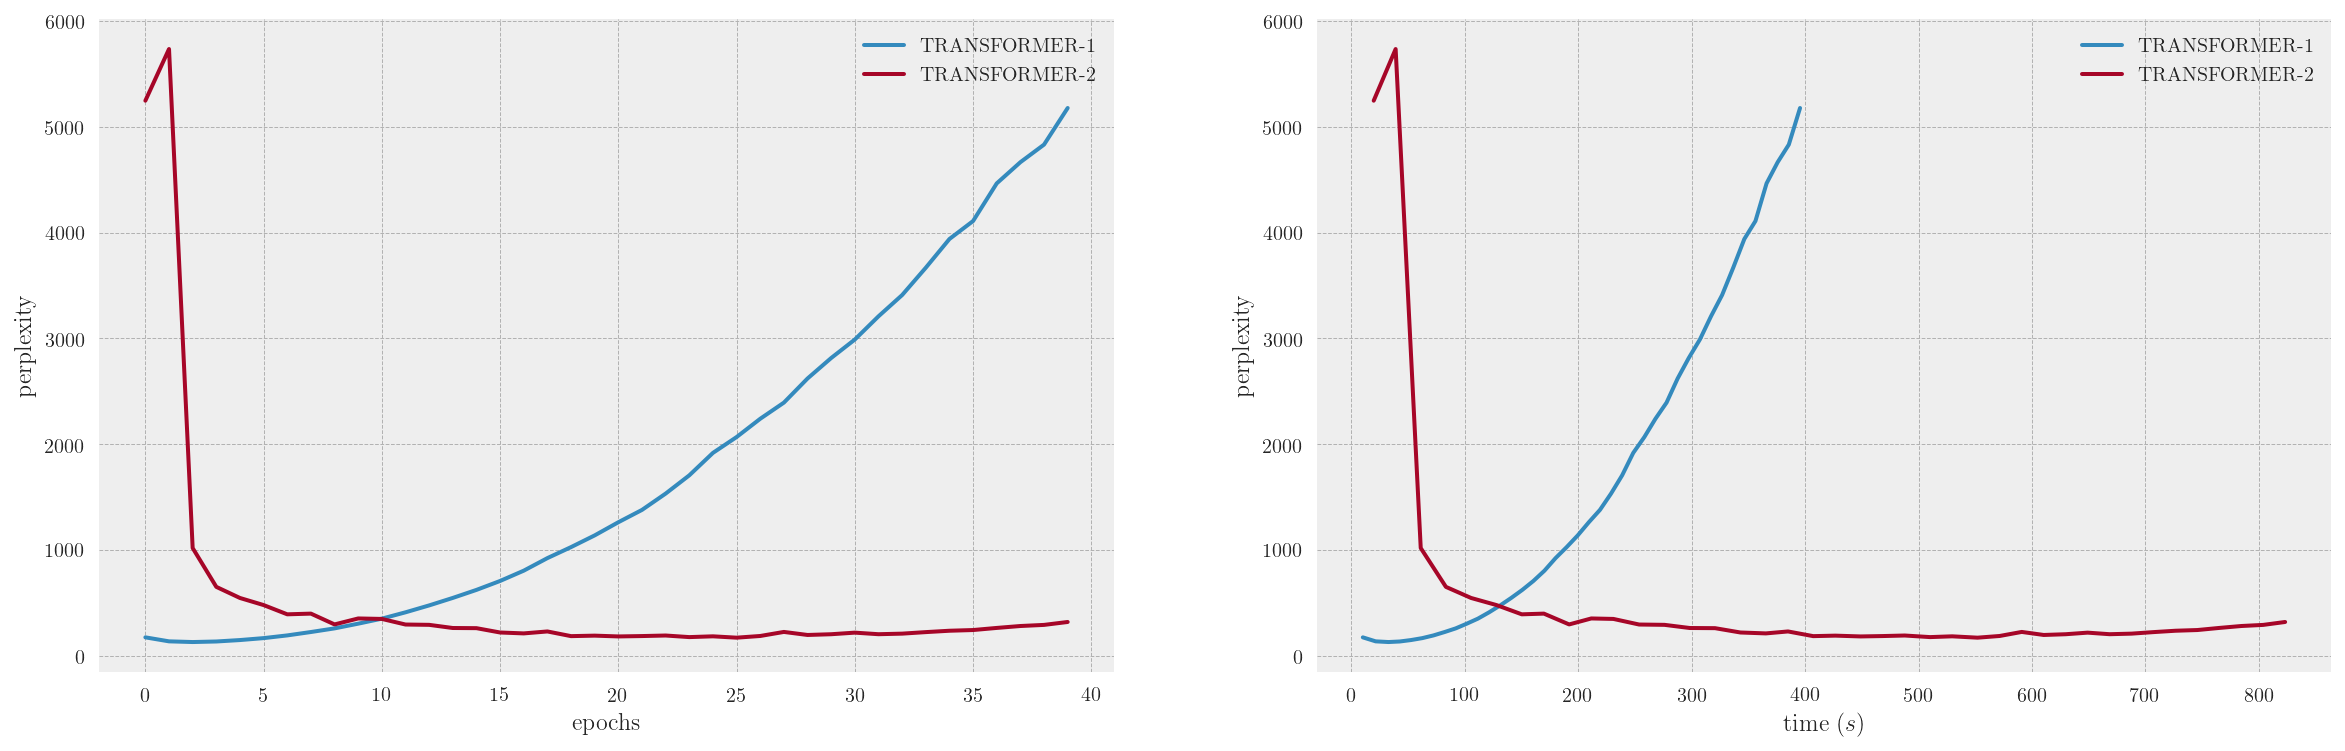

In [17]:
plot_compare(experiments, axis = 'model')